## Ne2

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
Gpp = pd.read_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Nebraska/Data_Neb_i_m_s/LandSat_Gpp.csv')
ndvi = pd.read_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Nebraska/Data_Neb_i_m_s/LandSat_NDVI.csv')
Nppy = pd.read_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Nebraska/Data_Neb_i_m_s/LandSat_Nppy.csv')

In [48]:
Gpp.shape

(116242, 6)

In [49]:
Gpp.head()

,system:index,Date,GPP,latitude,longitude,.geo
0,0,2.015010e+11,3,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."
1,1,2.015012e+11,20,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."
2,2,2.015020e+11,15,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."
3,3,2.015022e+11,5,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."
4,4,2.015031e+11,147,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."


In [50]:
Gpp.isna().sum()

,0
system:index,0
Date,0
GPP,0
latitude,0
longitude,0
.geo,0


In [51]:
Gpp.drop(columns=['system:index'], inplace=True)
Gpp['GPP'] = Gpp['GPP'] * 0.0001
Gpp['Date'] = Gpp['Date'].astype(str)
Gpp['Date'] = Gpp['Date'].str[:8]
Gpp['Date'] = Gpp['Date'].apply(lambda x: x[:-2] + '01' if x.endswith('00') else x)
Gpp['Date'] = pd.to_datetime(Gpp['Date'], format='%Y%m%d', errors='coerce')
Gpp.head()

,Date,GPP,latitude,longitude,.geo
0,2015-01-01,0.0003,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."
1,2015-01-16,0.0020,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."
2,2015-02-01,0.0015,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."
3,2015-02-17,0.0005,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."
4,2015-03-06,0.0147,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."


In [52]:
Gpp['Year'] = Gpp['Date'].dt.year

In [53]:
Gpp.head()

,Date,GPP,latitude,longitude,.geo,Year
0,2015-01-01,0.0003,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",2015
1,2015-01-16,0.0020,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",2015
2,2015-02-01,0.0015,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",2015
3,2015-02-17,0.0005,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",2015
4,2015-03-06,0.0147,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",2015


In [54]:
Gppy = pd.DataFrame(Gpp.groupby(['Year','latitude','longitude'])['GPP'].sum()).reset_index()

In [55]:
Gppy.head()

,Year,latitude,longitude,GPP
0,2015,41.16166,-96.470572,1.5606
1,2015,41.16166,-96.470303,1.5860
2,2015,41.16166,-96.470033,1.6086
3,2015,41.16166,-96.469764,1.6555
4,2015,41.16166,-96.469494,1.6307


In [56]:
Gppy.rename(columns={'GPP': 'Gppy'}, inplace=True)

In [57]:
Gppy.shape

(5054, 4)

In [58]:
Gpp_merged = pd.merge(Gpp, Gppy, on=['Year', 'latitude','longitude'], how='inner')
Gpp_merged.head()

,Date,GPP,latitude,longitude,.geo,Year,Gppy
0,2015-01-01,0.0003,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",2015,1.5606
1,2015-01-16,0.0020,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",2015,1.5606
2,2015-02-01,0.0015,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",2015,1.5606
3,2015-02-17,0.0005,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",2015,1.5606
4,2015-03-06,0.0147,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",2015,1.5606


In [59]:
Gpp_merged.shape

(116242, 7)

In [60]:
Gpp_merged.drop(columns=['Year'],inplace=True)

In [61]:
Gpp_merged.head()

,Date,GPP,latitude,longitude,.geo,Gppy
0,2015-01-01,0.0003,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",1.5606
1,2015-01-16,0.0020,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",1.5606
2,2015-02-01,0.0015,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",1.5606
3,2015-02-17,0.0005,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",1.5606
4,2015-03-06,0.0147,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",1.5606


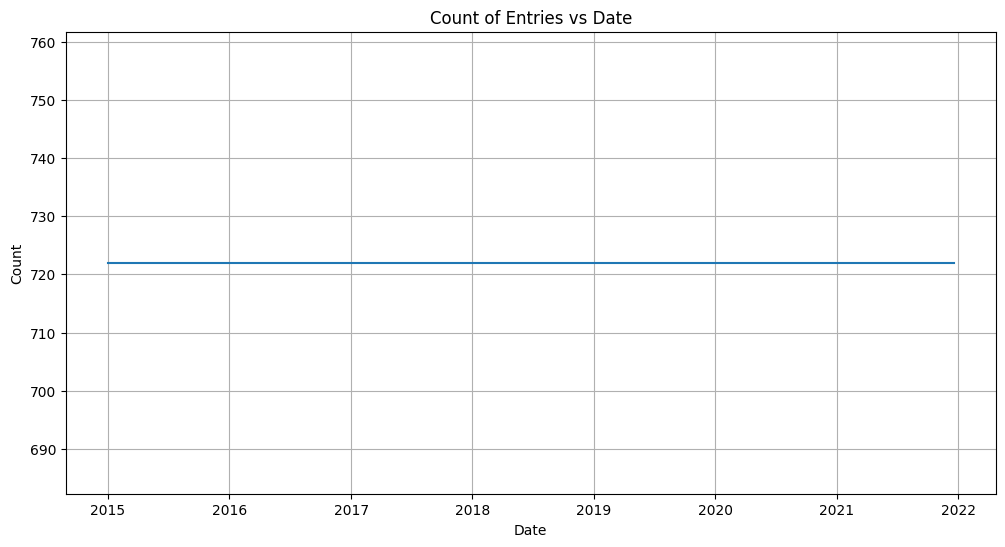

In [62]:
# Group by date and count the number of entries
date_counts = Gpp_merged.groupby('Date').size()

# Plotting the counts vs date
plt.figure(figsize=(12, 6))
plt.plot(date_counts.index, date_counts.values)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Entries vs Date')
plt.grid(True)
plt.show()


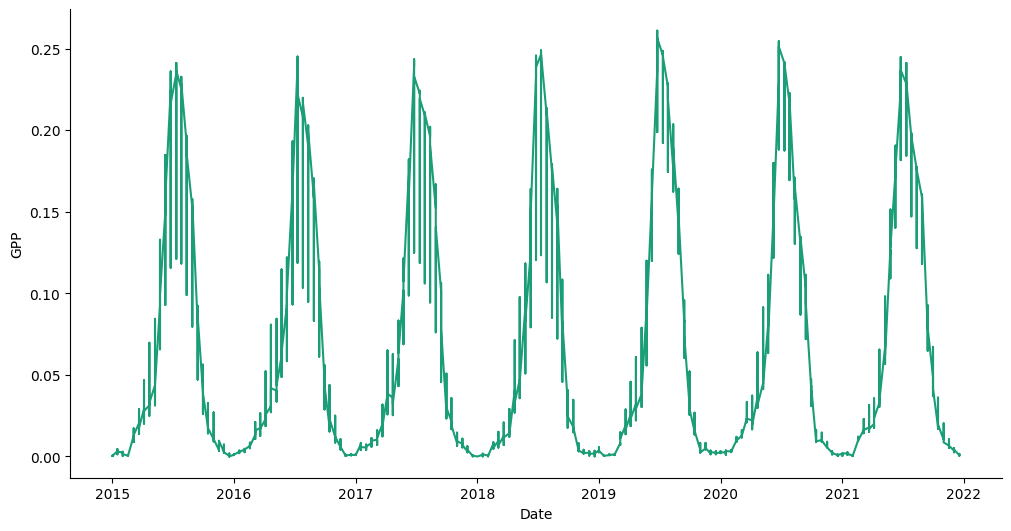

In [63]:
# @title Date vs GPP

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette =  sns.color_palette('Dark2')
  xs = series['Date']
  ys = series['GPP']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Gpp_merged.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('GPP')

In [64]:
unique_date_lat_lon = Gpp_merged[['latitude', 'longitude']].drop_duplicates()
print(unique_date_lat_lon)

         latitude  longitude
0       41.161660 -96.470572
161     41.161660 -96.470303
322     41.161660 -96.470033
483     41.161660 -96.469764
644     41.161660 -96.469494
...           ...        ...
115437  41.168397 -96.468686
115598  41.168397 -96.468416
115759  41.168397 -96.468147
115920  41.168397 -96.467877
116081  41.168397 -96.467608

[722 rows x 2 columns]


In [65]:
ndvi.head()

,system:index,Date,NDVI,latitude,longitude,.geo
0,0,2.015010e+11,NaN,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."
1,1,2.015011e+11,0.21628,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."
2,2,2.015012e+11,NaN,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."
3,3,2.015012e+11,NaN,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."
4,4,2.015020e+11,NaN,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."


In [66]:
ndvi.shape

(232484, 6)

In [67]:
ndvi.isna().sum()

,0
system:index,0
Date,0
NDVI,177420
latitude,0
longitude,0
.geo,0


In [68]:
ndvi.dropna(inplace=True)

In [69]:
ndvi.shape

(55064, 6)

In [70]:
ndvi.drop(columns=['system:index'], inplace=True)
ndvi['NDVI'] = ndvi['NDVI']
ndvi['Date'] = ndvi['Date'].astype(str)
ndvi['Date'] = ndvi['Date'].str[:8]
ndvi['Date'] = ndvi['Date'].apply(lambda x: x[:-2] + '01' if x.endswith('00') else x)
ndvi['Date'] = pd.to_datetime(ndvi['Date'], format='%Y%m%d', errors='coerce')
ndvi.head()

,Date,NDVI,latitude,longitude,.geo
1,2015-01-09,0.216280,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."
8,2015-03-06,0.157344,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."
9,2015-03-14,0.216989,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."
12,2015-04-06,0.208805,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."
13,2015-04-14,0.263168,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."


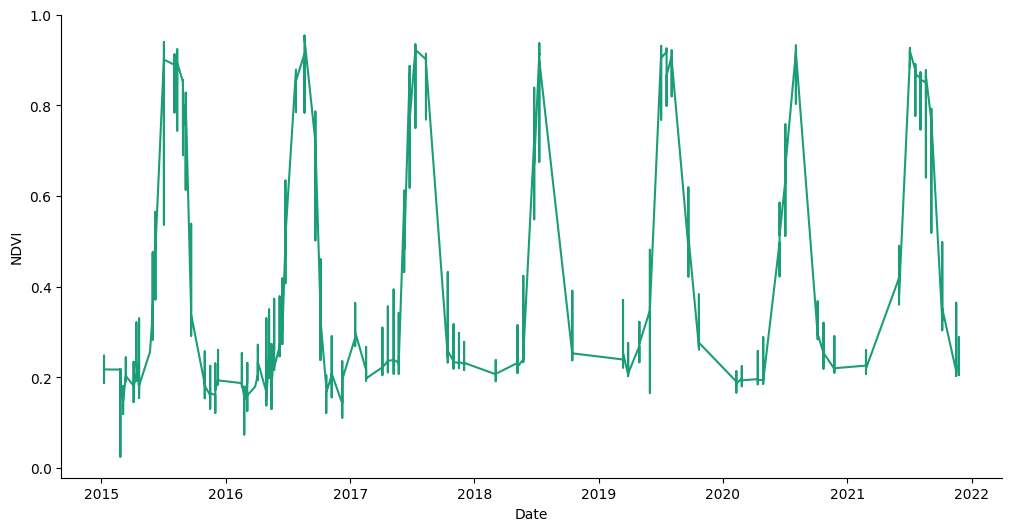

In [71]:
# @title Date vs NDVI

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette =  sns.color_palette('Dark2')
  xs = series['Date']
  ys = series['NDVI']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ndvi.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('NDVI')

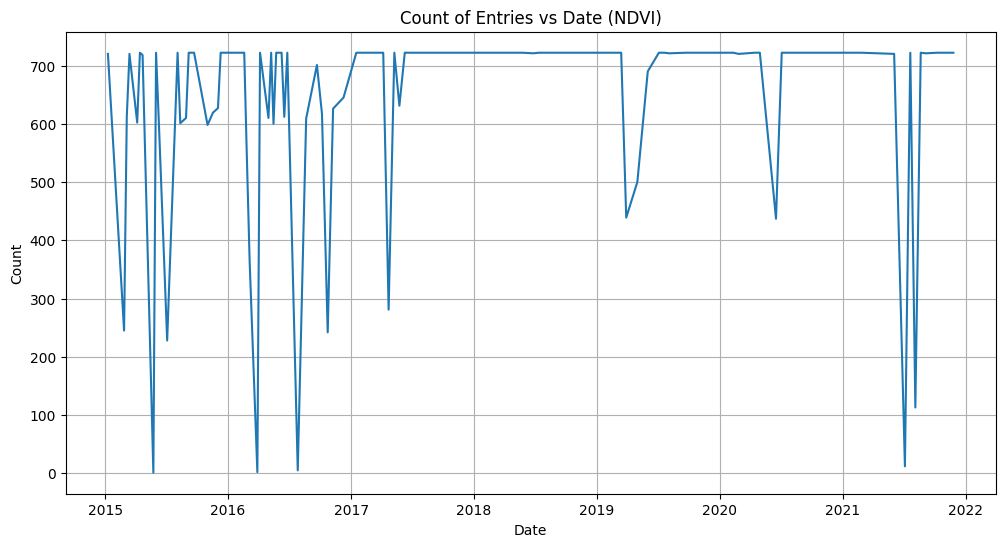

In [72]:
# Group by date and count the number of entries
date_counts_ndvi = ndvi.groupby('Date').size()

# Plotting the counts vs date
plt.figure(figsize=(12, 6))
plt.plot(date_counts_ndvi.index, date_counts_ndvi.values)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Entries vs Date (NDVI)')
plt.grid(True)
plt.show()


In [73]:
ndvi.drop(columns=['.geo'],inplace=True)

In [74]:
#merge Gpp and NDVI on Date, latitude and longitude

merged_df = pd.merge(Gpp_merged, ndvi, on=['Date', 'latitude', 'longitude'], how='inner')
merged_df.head()

,Date,GPP,latitude,longitude,.geo,Gppy,NDVI
0,2015-03-06,0.0147,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",1.5606,0.157344
1,2015-04-06,0.0335,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",1.5606,0.208805
2,2015-04-22,0.0477,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",1.5606,0.227760
3,2015-06-09,0.1487,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",1.5606,0.509586
4,2015-08-12,0.1828,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",1.5606,0.863541


In [75]:
merged_df.shape

(24926, 7)

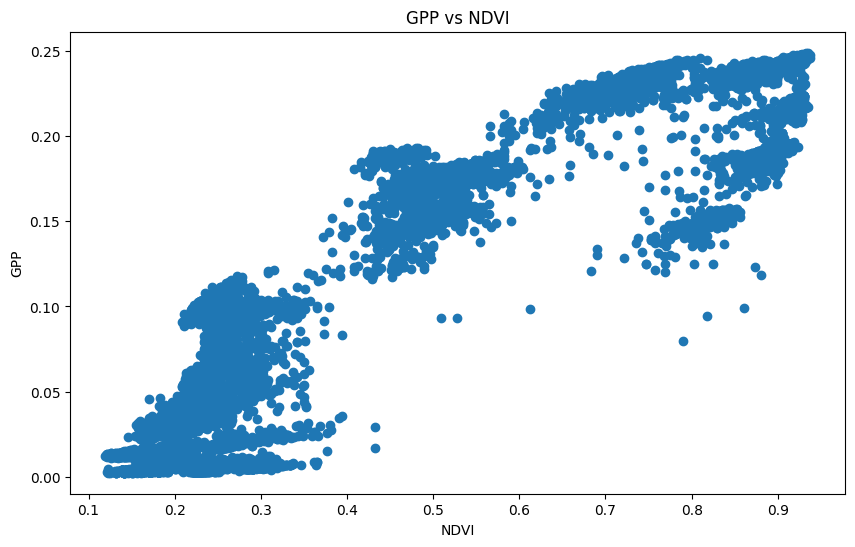

In [76]:
# @title GPP vs NDVI

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['NDVI'], merged_df['GPP'])
plt.xlabel('NDVI')
plt.ylabel('GPP')
_ = plt.title('GPP vs NDVI')


In [77]:
Nppy.shape

(4332, 6)

In [78]:
Nppy.isna().sum()

,0
system:index,0
Date,0
NPPy,0
latitude,0
longitude,0
.geo,0


In [79]:
Nppy.dropna(inplace=True)

In [80]:
Nppy.head()

,system:index,Date,NPPy,latitude,longitude,.geo
0,0,2.015010e+11,8462,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."
1,1,2.016010e+11,7881,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."
2,2,2.017010e+11,8393,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."
3,3,2.018010e+11,7401,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."
4,4,2.019010e+11,8819,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."


In [81]:
Nppy.drop(columns=['system:index'], inplace=True)
Nppy['NPPy'] = Nppy['NPPy']*0.0001
Nppy['Date'] = Nppy['Date'].astype(str)
Nppy['Date'] = Nppy['Date'].str[:8]
Nppy['Date'] = Nppy['Date'].apply(lambda x: x[:-2] + '01' if x.endswith('00') else x)
Nppy['Date'] = pd.to_datetime(Nppy['Date'], format='%Y%m%d', errors='coerce')
Nppy.head()

,Date,NPPy,latitude,longitude,.geo
0,2015-01-01,0.8462,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."
1,2016-01-01,0.7881,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."
2,2017-01-01,0.8393,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."
3,2018-01-01,0.7401,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."
4,2019-01-01,0.8819,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500..."


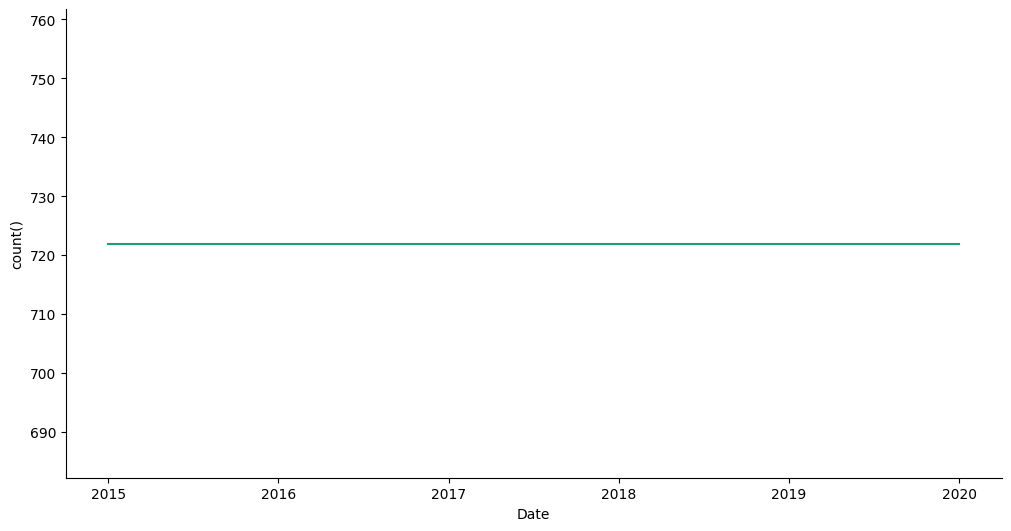

In [82]:
# @title Date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Nppy.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

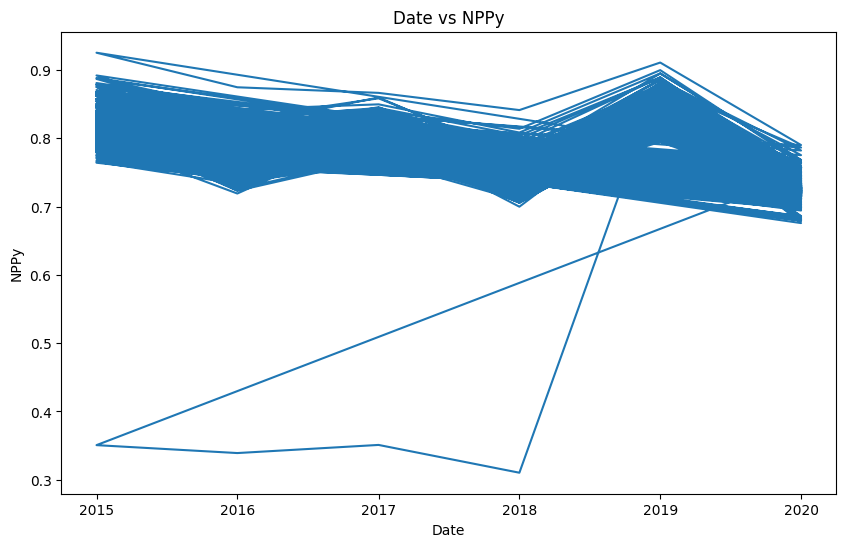

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(Nppy['Date'], Nppy['NPPy'])
plt.xlabel('Date')
plt.ylabel('NPPy')
plt.title('Date vs NPPy')
plt.show()

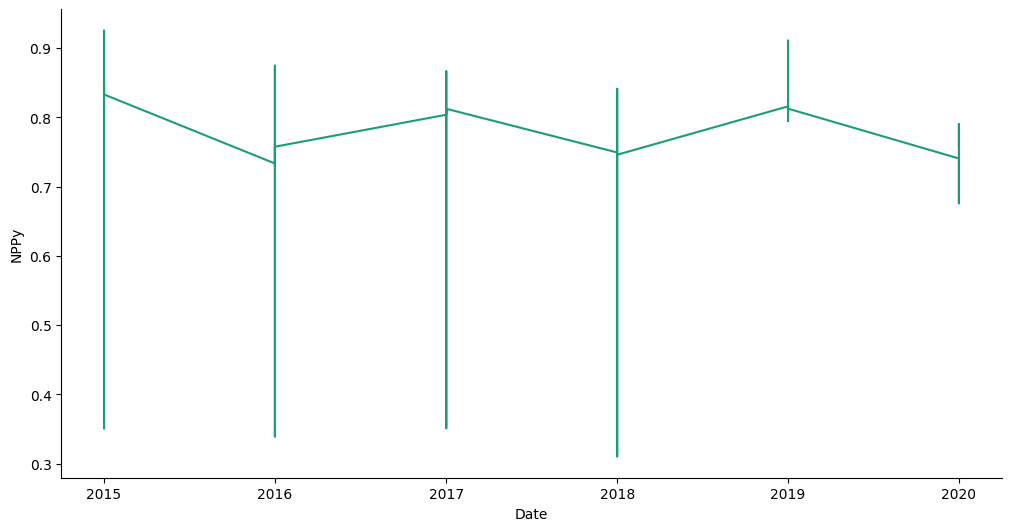

In [84]:
# @title Date vs NPPy

def _plot_series(series, series_name, series_index=0):
  palette =  sns.color_palette('Dark2')
  xs = series['Date']
  ys = series['NPPy']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Nppy.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('NPPy')


In [ ]:
Nppy.drop(columns=['.geo'], inplace=True)

In [ ]:
# Extract year from the 'Date' column and create a new 'year' column
Nppy['year'] = Nppy['Date'].dt.year

In [ ]:
Nppy.head()

,Date,NPPy,latitude,longitude,year
0,2015-01-01,0.8462,41.16166,-96.470572,2015
1,2016-01-01,0.7881,41.16166,-96.470572,2016
2,2017-01-01,0.8393,41.16166,-96.470572,2017
3,2018-01-01,0.7401,41.16166,-96.470572,2018
4,2019-01-01,0.8819,41.16166,-96.470572,2019


In [ ]:
Nppy.drop(columns=['Date'], inplace=True)

In [ ]:
merged_df['year'] = merged_df['Date'].dt.year
merged_df.head()

,Date,GPP,latitude,longitude,.geo,Gppy,NDVI,year
0,2015-03-06,0.0147,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",1.5606,0.157344,2015
1,2015-04-06,0.0335,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",1.5606,0.208805,2015
2,2015-04-22,0.0477,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",1.5606,0.227760,2015
3,2015-06-09,0.1487,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",1.5606,0.509586,2015
4,2015-08-12,0.1828,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",1.5606,0.863541,2015


In [ ]:
merged_df.shape

(24926, 8)

In [ ]:
merged_data = pd.merge(merged_df, Nppy, on=['year', 'latitude', 'longitude'], how='inner')
merged_data.head()

,Date,GPP,latitude,longitude,.geo,Gppy,NDVI,year,NPPy
0,2015-03-06,0.0147,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",1.5606,0.157344,2015,0.8462
1,2015-04-06,0.0335,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",1.5606,0.208805,2015,0.8462
2,2015-04-22,0.0477,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",1.5606,0.227760,2015,0.8462
3,2015-06-09,0.1487,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",1.5606,0.509586,2015,0.8462
4,2015-08-12,0.1828,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",1.5606,0.863541,2015,0.8462


In [ ]:
merged_data.shape

(24204, 9)

In [ ]:
# Rearrange the columns in the desired order
new_column_order = ['Date', 'latitude', 'longitude', '.geo', 'GPP', 'NDVI', 'Gppy', 'NPPy']
merged_data = merged_data[new_column_order]

In [ ]:
merged_data.head()

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy
0,2015-03-06,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",0.0147,0.157344,1.5606,0.8462
1,2015-04-06,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",0.0335,0.208805,1.5606,0.8462
2,2015-04-22,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",0.0477,0.227760,1.5606,0.8462
3,2015-06-09,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",0.1487,0.509586,1.5606,0.8462
4,2015-08-12,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",0.1828,0.863541,1.5606,0.8462


In [ ]:
merged_data.shape

(24204, 8)

In [ ]:
merged_data.isna().sum()

,0
Date,0
latitude,0
longitude,0
.geo,0
GPP,0
NDVI,0
Gppy,0
NPPy,0


In [ ]:
merged_data.head()

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy
0,2015-03-06,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",0.0147,0.157344,1.5606,0.8462
1,2015-04-06,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",0.0335,0.208805,1.5606,0.8462
2,2015-04-22,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",0.0477,0.227760,1.5606,0.8462
3,2015-06-09,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",0.1487,0.509586,1.5606,0.8462
4,2015-08-12,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",0.1828,0.863541,1.5606,0.8462


In [ ]:
merged_data['Npp'] = (merged_data['GPP'] / merged_data['Gppy']) * merged_data['NPPy']

In [ ]:
merged_data.head()

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy,Npp
0,2015-03-06,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",0.0147,0.157344,1.5606,0.8462,0.007971
1,2015-04-06,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",0.0335,0.208805,1.5606,0.8462,0.018165
2,2015-04-22,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",0.0477,0.227760,1.5606,0.8462,0.025864
3,2015-06-09,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",0.1487,0.509586,1.5606,0.8462,0.080629
4,2015-08-12,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",0.1828,0.863541,1.5606,0.8462,0.099119


In [ ]:
merged_data.isna().sum()

,0
Date,0
latitude,0
longitude,0
.geo,0
GPP,0
NDVI,0
Gppy,0
NPPy,0
Npp,0


In [ ]:
merged_data.shape

(24204, 9)

In [ ]:
# Export the dataframe to a CSV file
merged_data.to_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Nebraska/Data_Neb_i_m_s/neb_i_m_s.csv', index=False)


##Ground Truth Data

In [ ]:
arm_data = pd.read_csv('/content/drive/Shareddrives/DATA298B/Ameriflux data/Nebraska/US-Ne2.csv', skiprows=2)
arm_data

,TIMESTAMP_START,TIMESTAMP_END,FC_1_1_1,SC_PI_F_1_1_1,SC_1_1_1,USTAR_1_1_1,LE_1_1_1,LE_PI_F_1_1_1,H_1_1_1,H_PI_F_1_1_1,...,SWC_PI_1_SD,SWC_PI_F_2,SWC_PI_2_N,SWC_PI_2_SD,SWC_PI_F_3,SWC_PI_3_N,SWC_PI_3_SD,SWC_PI_F_4,SWC_PI_4_N,SWC_PI_4_SD
0,200101010000,200101010100,-9999.00,-9999.0,-9999.0,-9999.000,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
1,200101010100,200101010200,-9999.00,-9999.0,-9999.0,-9999.000,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
2,200101010200,200101010300,-9999.00,-9999.0,-9999.0,-9999.000,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
3,200101010300,200101010400,-9999.00,-9999.0,-9999.0,-9999.000,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
4,200101010400,200101010500,-9999.00,-9999.0,-9999.0,-9999.000,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204499,202404301900,202404302000,2.28,0.2,0.2,0.595,67.4,-9999.0,-99.7,-9999.0,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
204500,202404302000,202404302100,1.59,0.2,0.2,0.422,7.0,-9999.0,-46.7,-9999.0,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
204501,202404302100,202404302200,0.73,0.4,0.4,0.107,1.3,-9999.0,-11.9,-9999.0,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
204502,202404302200,202404302300,2.98,0.6,0.6,0.123,-1.4,-9999.0,-18.6,-9999.0,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0


In [ ]:
arm_data=arm_data.drop('TIMESTAMP_START',axis=1)

arm_data=arm_data.rename(columns={'TIMESTAMP_END': 'TIMESTAMP'})
arm_data['TIMESTAMP'] = pd.to_datetime(arm_data['TIMESTAMP'], format='%Y%m%d%H%M')
arm_data = arm_data[(arm_data['TIMESTAMP'].dt.year >= 2015) & (arm_data['TIMESTAMP'].dt.year <= 2021)]
arm_data['TIMESTAMP'] = pd.to_datetime(arm_data['TIMESTAMP'])
arm_data['TIMESTAMP'] = arm_data['TIMESTAMP'].dt.date
data = arm_data

<ipython-input-60-2cc50464675b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arm_data['TIMESTAMP'] = pd.to_datetime(arm_data['TIMESTAMP'])
<ipython-input-60-2cc50464675b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arm_data['TIMESTAMP'] = arm_data['TIMESTAMP'].dt.date


In [ ]:
# Define the column range to check (excluding the Date column)
cols_to_check = data.columns[2:]  # This excludes the Date column

# Use apply with a lambda function to check if all values from Col1 to Col149 are -9999.0
rows_to_keep = data[cols_to_check].apply(lambda row: not (row == -9999.0).all(), axis=1)

# Filter the DataFrame to retain rows where not all values are -9999.0
data= data[rows_to_keep]
data

,TIMESTAMP,FC_1_1_1,SC_PI_F_1_1_1,SC_1_1_1,USTAR_1_1_1,LE_1_1_1,LE_PI_F_1_1_1,H_1_1_1,H_PI_F_1_1_1,G_PI_F_1_1_1,...,SWC_PI_1_SD,SWC_PI_F_2,SWC_PI_2_N,SWC_PI_2_SD,SWC_PI_F_3,SWC_PI_3_N,SWC_PI_3_SD,SWC_PI_F_4,SWC_PI_4_N,SWC_PI_4_SD
122711,2015-01-01,0.19,0.1,0.1,0.177,2.5,2.5,-13.6,-13.6,-23.1,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
122712,2015-01-01,0.22,0.1,0.1,0.133,1.3,-9999.0,-13.9,-9999.0,-24.1,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
122713,2015-01-01,0.01,0.0,0.0,0.214,2.6,-9999.0,-15.1,-9999.0,-24.2,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
122714,2015-01-01,0.34,0.0,0.0,0.139,0.5,-9999.0,-16.1,-9999.0,-23.0,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
122715,2015-01-01,0.06,0.0,0.0,0.071,0.5,-9999.0,-2.9,-9999.0,-21.9,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184074,2021-12-31,-2.21,0.0,0.0,0.638,-9999.0,19.9,-0.3,-0.3,-18.2,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
184075,2021-12-31,2.86,0.1,0.1,0.697,-9999.0,-10.0,-58.9,18.9,-19.7,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
184076,2021-12-31,-1.82,0.1,0.1,0.567,-9999.0,4.9,90.7,24.9,-22.8,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
184077,2021-12-31,-1.09,0.0,0.0,0.658,-9999.0,-0.3,52.3,34.0,-23.1,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0


In [ ]:
# Function to rename columns by replacing '_IN_' with 'IN' and '_OUT_' with 'OUT'
def rename_in_out_columns(col_name):
    if '_IN_' in col_name:
        return col_name.replace('_IN_', 'IN_')
    elif '_OUT_' in col_name:
        return col_name.replace('_OUT_', 'OUT_')
    else:
        return col_name

# Apply the function to all columns
data.columns = [rename_in_out_columns(col) for col in arm_data.columns]

# Display the first few rows to check the results
data.head()

,TIMESTAMP,FC_1_1_1,SC_PI_F_1_1_1,SC_1_1_1,USTAR_1_1_1,LE_1_1_1,LE_PI_F_1_1_1,H_1_1_1,H_PI_F_1_1_1,G_PI_F_1_1_1,...,SWC_PI_1_SD,SWC_PI_F_2,SWC_PI_2_N,SWC_PI_2_SD,SWC_PI_F_3,SWC_PI_3_N,SWC_PI_3_SD,SWC_PI_F_4,SWC_PI_4_N,SWC_PI_4_SD
122711,2015-01-01,0.19,0.1,0.1,0.177,2.5,2.5,-13.6,-13.6,-23.1,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
122712,2015-01-01,0.22,0.1,0.1,0.133,1.3,-9999.0,-13.9,-9999.0,-24.1,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
122713,2015-01-01,0.01,0.0,0.0,0.214,2.6,-9999.0,-15.1,-9999.0,-24.2,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
122714,2015-01-01,0.34,0.0,0.0,0.139,0.5,-9999.0,-16.1,-9999.0,-23.0,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0
122715,2015-01-01,0.06,0.0,0.0,0.071,0.5,-9999.0,-2.9,-9999.0,-21.9,...,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0


In [ ]:
# Replace -9999.0 with NaN
data.replace(-9999.0, np.nan, inplace=True)

# Count missing values (NaNs) in each column
missing_values_count = data.isnull().sum()

# Calculate percentage of missing values in each column
missing_values_percent = (missing_values_count / len(data)) * 100

# Drop columns where missing values exceed 50%
data = data.drop(columns=missing_values_percent[missing_values_percent > 40].index)

# Ensure pandas shows all columns
pd.set_option('display.max_columns', None)
data

,TIMESTAMP,FC_1_1_1,SC_PI_F_1_1_1,SC_1_1_1,USTAR_1_1_1,LE_1_1_1,H_1_1_1,G_PI_F_1_1_1,CO2_PI_F_1_1_1,CO2_PI_F_1_2_1,CO2_PI_F_1_3_1,CO2_PI_F_1_4_1,CO2_1_1_1,CO2_1_2_1,CO2_1_3_1,CO2_1_4_1,TA_PI_F_1_1_1,TA_PI_F_1_2_1,TA_PI_F_1_3_1,TA_PI_F_1_4_1,RH_PI_F_1_1_1,RH_PI_F_1_2_1,RH_PI_F_1_3_1,RH_PI_F_1_4_1,TA_1_1_1,TA_1_2_1,TA_1_3_1,TA_1_4_1,RH_1_1_1,RH_1_2_1,RH_1_3_1,RH_1_4_1,P_PI_F_1_1_1,P_PI_F_2_2_1,TS_PI_F_1_1_1,TS_PI_F_1_2_1,TS_PI_F_1_3_1,TS_PI_F_1_4_1,TS_PI_F_2_1_1,TS_PI_F_2_2_1,TS_PI_F_2_3_1,TS_PI_F_2_4_1,TS_PI_F_2_6_1,TS_PI_F_2_8_1,TS_1_1_1,TS_1_2_1,TS_1_3_1,TS_1_4_1,TS_2_1_1,TS_2_2_1,TS_2_3_1,TS_2_4_1,TS_2_6_1,TS_2_8_1,PPFDIN_PI_F_1_1_1,PPFDOUT_PI_F_1_1_1,SWIN_PI_F_1_1_1,SWOUT_PI_F_1_1_1,NETRAD_PI_F_1_1_1,PPFD_DIF_PI_F_1_1_1,PPFD_DIR_PI_F_1_1_1,LWIN_PI_F_1_1_1,LWOUT_PI_F_1_1_1,SWIN_1_1_1,SWOUT_1_1_1,NETRAD_1_1_1,LWIN_1_1_1,LWOUT_1_1_1,WD_1_1_1,WS_1_2_1,WS_1_3_1,WS_2_1_1,PA_PI_F_1_1_1,PA_1_1_1,ZL_1_1_1,NEE_PI_1_1_1,SWC_PI_F_1_1_1,SWC_PI_F_1_2_1,SWC_PI_F_1_3_1,SWC_PI_F_1_4_1,SWC_PI_F_2_1_1,SWC_PI_F_2_2_1,SWC_PI_F_2_3_1,SWC_PI_F_2_4_1,SWC_PI_F_3_1_1,SWC_PI_F_3_2_1,SWC_PI_F_3_3_1,SWC_PI_F_3_4_1,SWC_1_1_1,SWC_1_2_1,SWC_1_3_1,SWC_1_4_1,SWC_2_1_1,SWC_2_2_1,SWC_2_3_1,SWC_2_4_1,SWC_3_1_1,SWC_3_2_1,SWC_3_3_1,SWC_3_4_1
122711,2015-01-01,0.19,0.1,0.1,0.177,2.5,-13.6,-23.1,411.38,411.38,411.47,411.70,411.38,411.38,411.47,411.70,-12.50,-13.04,-12.44,-13.91,74.8,78.3,73.9,86.0,-12.50,-13.04,-12.44,-13.91,74.8,78.3,73.9,86.0,0.0,0.0,-1.81,-2.24,-2.18,-0.98,-1.71,-0.74,-0.39,0.40,NaN,3.13,NaN,-2.24,-2.18,-0.98,-1.71,-0.74,-0.39,0.40,NaN,3.13,0.0,0.0,-0.2,0.0,-55.7,0.0,0.0,198.9,254.4,-0.2,0.0,-55.7,198.9,254.4,265,3.72,3.38,3.38,98.07,98.07,0.084,0.30,19.1,28.3,42.6,44.1,30.5,34.4,42.1,45.8,18.3,29.9,38.1,44.2,19.1,28.3,42.6,44.1,30.5,34.4,42.1,45.8,18.3,29.9,38.1,44.2
122712,2015-01-01,0.22,0.1,0.1,0.133,1.3,-13.9,-24.1,412.64,412.72,412.89,413.07,412.64,412.72,412.89,413.07,-12.76,-13.34,-12.79,-14.22,75.8,79.6,75.3,87.1,-12.76,-13.34,-12.79,-14.22,75.8,79.6,75.3,87.1,0.0,0.0,-1.86,-2.29,-2.23,-1.03,-1.75,-0.75,-0.40,0.40,NaN,3.12,NaN,-2.29,-2.23,-1.03,-1.75,-0.75,-0.40,0.40,NaN,3.12,0.0,0.0,0.0,0.0,-53.4,0.0,0.0,199.8,253.1,0.0,0.0,-53.4,199.8,253.1,238,3.03,2.73,2.60,97.97,97.97,0.191,0.30,18.9,28.3,42.6,44.1,30.1,34.4,42.0,45.9,18.2,29.9,38.1,44.2,18.9,28.3,42.6,44.1,30.1,34.4,42.0,45.9,18.2,29.9,38.1,44.2
122713,2015-01-01,0.01,0.0,0.0,0.214,2.6,-15.1,-24.2,413.55,413.66,413.77,413.93,413.55,413.66,413.77,413.93,-12.79,-13.32,-12.68,-14.00,76.5,80.2,75.3,86.6,-12.79,-13.32,-12.68,-14.00,76.5,80.2,75.3,86.6,0.0,0.0,-1.91,-2.34,-2.29,-1.08,-1.80,-0.77,-0.42,0.39,NaN,3.11,NaN,-2.34,-2.29,-1.08,-1.80,-0.77,-0.42,0.39,NaN,3.11,0.0,0.0,0.0,0.0,-52.7,0.0,0.0,200.6,253.3,0.0,0.0,-52.7,200.6,253.3,237,3.71,3.38,3.24,97.91,97.91,0.053,0.00,18.8,28.3,42.6,44.1,29.6,34.4,42.1,45.8,18.1,29.9,38.1,44.2,18.8,28.3,42.6,44.1,29.6,34.4,42.1,45.8,18.1,29.9,38.1,44.2
122714,2015-01-01,0.34,0.0,0.0,0.139,0.5,-16.1,-23.0,414.76,414.87,414.99,415.16,414.76,414.87,414.99,415.16,-12.39,-12.92,-12.34,-13.74,77.1,80.7,76.1,87.7,-12.39,-12.92,-12.34,-13.74,77.1,80.7,76.1,87.7,0.0,0.0,-1.91,-2.39,-2.34,-1.12,-1.81,-0.79,-0.43,0.38,NaN,3.09,NaN,-2.39,-2.34,-1.12,-1.81,-0.79,-0.43,0.38,NaN,3.09,0.0,0.0,0.0,0.0,-51.0,0.0,0.0,203.9,254.8,0.0,0.0,-51.0,203.9,254.8,277,3.17,2.67,2.66,97.87,97.87,0.198,0.40,18.6,28.3,42.6,44.1,29.1,34.4,42.0,45.8,18.0,29.9,38.1,44.2,18.6,28.3,42.6,44.1,29.1,34.4,42.0,45.8,18.0,29.9,38.1,44.2
122715,2015-01-01,0.06,0.0,0.0,0.071,0.5,-2.9,-21.9,413.90,414.27,414.78,415.44,413.90,414.27,414.78,415.44,-11.73,-12.51,-12.32,-13.98,77.0,81.7,78.3,90.8,-11.73,-12.51,-12.32,-13.98,77.0,81.7,78.3,90.8,0.0,0.0,-1.91,-2.38,-2.33,-1.16,-1.80,-0.80,-0.45,0.37,NaN,3.08,NaN,-2.38,-2.33,-1.16,-1.80,-0.80,-0.45,0.37,NaN,3.08,0.0,0.0,0.0,0.0,-45.8,0.0,0.0,207.4,253.2,0.0,0.0,-45.8,207.4,253.2,286,2.24,1.70,1.75,97.82,97.82,0.265,0.00,18.5,28.3,42.6,44.1,28.7,34.4,42.0,45.9,17.9,29.9,38.1,44.2,18.5,28.3,42.6,44.1,28.7,34.4,42.0,45.9,17.9,29.9,38.1,44.2
...,...,

In [ ]:
fc_columns = [col for col in data.columns if 'FC' in col]
pi_columns = [col for col in data.columns if '_PI_F' in col]
data=data.drop(pi_columns, axis=1)
data

,TIMESTAMP,FC_1_1_1,SC_1_1_1,USTAR_1_1_1,LE_1_1_1,H_1_1_1,CO2_1_1_1,CO2_1_2_1,CO2_1_3_1,CO2_1_4_1,TA_1_1_1,TA_1_2_1,TA_1_3_1,TA_1_4_1,RH_1_1_1,RH_1_2_1,RH_1_3_1,RH_1_4_1,TS_1_1_1,TS_1_2_1,TS_1_3_1,TS_1_4_1,TS_2_1_1,TS_2_2_1,TS_2_3_1,TS_2_4_1,TS_2_6_1,TS_2_8_1,SWIN_1_1_1,SWOUT_1_1_1,NETRAD_1_1_1,LWIN_1_1_1,LWOUT_1_1_1,WD_1_1_1,WS_1_2_1,WS_1_3_1,WS_2_1_1,PA_1_1_1,ZL_1_1_1,NEE_PI_1_1_1,SWC_1_1_1,SWC_1_2_1,SWC_1_3_1,SWC_1_4_1,SWC_2_1_1,SWC_2_2_1,SWC_2_3_1,SWC_2_4_1,SWC_3_1_1,SWC_3_2_1,SWC_3_3_1,SWC_3_4_1
122711,2015-01-01,0.19,0.1,0.177,2.5,-13.6,411.38,411.38,411.47,411.70,-12.50,-13.04,-12.44,-13.91,74.8,78.3,73.9,86.0,NaN,-2.24,-2.18,-0.98,-1.71,-0.74,-0.39,0.40,NaN,3.13,-0.2,0.0,-55.7,198.9,254.4,265,3.72,3.38,3.38,98.07,0.084,0.30,19.1,28.3,42.6,44.1,30.5,34.4,42.1,45.8,18.3,29.9,38.1,44.2
122712,2015-01-01,0.22,0.1,0.133,1.3,-13.9,412.64,412.72,412.89,413.07,-12.76,-13.34,-12.79,-14.22,75.8,79.6,75.3,87.1,NaN,-2.29,-2.23,-1.03,-1.75,-0.75,-0.40,0.40,NaN,3.12,0.0,0.0,-53.4,199.8,253.1,238,3.03,2.73,2.60,97.97,0.191,0.30,18.9,28.3,42.6,44.1,30.1,34.4,42.0,45.9,18.2,29.9,38.1,44.2
122713,2015-01-01,0.01,0.0,0.214,2.6,-15.1,413.55,413.66,413.77,413.93,-12.79,-13.32,-12.68,-14.00,76.5,80.2,75.3,86.6,NaN,-2.34,-2.29,-1.08,-1.80,-0.77,-0.42,0.39,NaN,3.11,0.0,0.0,-52.7,200.6,253.3,237,3.71,3.38,3.24,97.91,0.053,0.00,18.8,28.3,42.6,44.1,29.6,34.4,42.1,45.8,18.1,29.9,38.1,44.2
122714,2015-01-01,0.34,0.0,0.139,0.5,-16.1,414.76,414.87,414.99,415.16,-12.39,-12.92,-12.34,-13.74,77.1,80.7,76.1,87.7,NaN,-2.39,-2.34,-1.12,-1.81,-0.79,-0.43,0.38,NaN,3.09,0.0,0.0,-51.0,203.9,254.8,277,3.17,2.67,2.66,97.87,0.198,0.40,18.6,28.3,42.6,44.1,29.1,34.4,42.0,45.8,18.0,29.9,38.1,44.2
122715,2015-01-01,0.06,0.0,0.071,0.5,-2.9,413.90,414.27,414.78,415.44,-11.73,-12.51,-12.32,-13.98,77.0,81.7,78.3,90.8,NaN,-2.38,-2.33,-1.16,-1.80,-0.80,-0.45,0.37,NaN,3.08,0.0,0.0,-45.8,207.4,253.2,286,2.24,1.70,1.75,97.82,0.265,0.00,18.5,28.3,42.6,44.1,28.7,34.4,42.0,45.9,17.9,29.9,38.1,44.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184074,2021-12-31,-2.21,0.0,0.638,NaN,-0.3,418.50,418.50,418.30,418.60,-7.37,-7.36,-7.43,-7.43,82.6,82.9,85.5,88.2,-1.80,-1.02,-0.47,-0.02,-2.06,-2.08,-1.50,-0.46,1.39,3.08,0.0,0.7,-4.4,277.6,281.3,11,6.53,5.89,6.21,96.59,0.000,-2.20,30.6,33.3,37.4,38.0,35.7,38.9,35.0,43.4,27.9,32.7,34.2,29.6
184075,2021-12-31,2.86,0.1,0.697,NaN,-58.9,420.00,420.10,420.20,420.00,-8.20,-8.16,-8.24,-8.19,78.6,79.2,81.6,84.3,-1.88,-1.09,-0.51,-0.05,-2.21,-2.22,-1.59,-0.49,1.38,3.08,0.0,0.6,-3.5,275.1,278.0,3,7.46,6.71,7.14,96.71,0.006,2.98,30.5,33.3,37.4,38.0,35.7,38.9,35.0,43.3,27.5,32.7,34.1,29.6
184076,2021-12-31,-1.82,0.1,0.567,NaN,90.7,421.10,421.10,421.10,421.00,-9.14,-9.09,-9.15,-9.07,77.1,77.7,79.8,82.5,-2.02,-1.16,-0.54,-0.07,-2.39,-2.40,-1.70,-0.53,1.37,3.07,0.0,0.5,-3.0,272.0,274.6,7,7.29,6.56,6.71,96.85,-0.017,-1.71,30.5,33.3,37.4,38.0,35.6,38.9,35.0,43.3,27.0,32.7,34.1,29.6
184077,2021-12-31,-1.09,0.0,0.658,NaN,52.3,421.00,420.90,421.10,420.90,-9.67,-9.63,-9.65,-9.58,77.0,77.6,79.4,81.8,-2.14,-1.23,-0.57,-0.09,-2.55,-2.58,-1.82,-0.56,1.35,3.06,0.0,0.3,-2.6,270.2,272.5,1,7.69,6.92,7.32,96.95,-0.006,-1.05,30.5,33.3,37.4,38.0,35.7,38.9,35.0,43.4,26.4,32.7,34.1,29.5


In [ ]:
# Extract unique parameters and heights from column names
column_names = data.columns
parameters = set()
heights = set()

# Identify parameters and heights based on column names
for col in column_names:
    parts = col.split('_')
    if len(parts) > 1:
        parameters.add(parts[0])
        heights.add('_'.join(parts[1:]))

# Convert sets to sorted lists
parameters = sorted(parameters)
heights = sorted(heights)

# Create new columns for maximum values
for param in parameters:
    # Collect column names for this parameter across all heights
    columns = [f'{param}_{height}' for height in heights if f'{param}_{height}' in data.columns]

    if columns:
        # Create a new column for the maximum value of this parameter across heights
        data[f'{param}'] = data[columns].max(axis=1)

# Optionally, drop the original columns if needed
data.drop(columns=[f'{param}_{height}' for param in parameters for height in heights if f'{param}_{height}' in data.columns], inplace=True)
# Reorder columns to place 'timestamp' as the first column
if 'TIMESTAMP' in data.columns:
    cols = ['TIMESTAMP'] + [col for col in data.columns if col != 'TIMESTAMP']
    data = data[cols]
# Display the first few rows to check the results
data

,TIMESTAMP,CO2,FC,H,LE,LWIN,LWOUT,NEE,NETRAD,PA,RH,SC,SWC,SWIN,SWOUT,TA,TS,USTAR,WD,WS,ZL
122711,2015-01-01,411.70,0.19,-13.6,2.5,198.9,254.4,0.30,-55.7,98.07,86.0,0.1,45.8,-0.2,0.0,-12.44,3.13,0.177,265,3.72,0.084
122712,2015-01-01,413.07,0.22,-13.9,1.3,199.8,253.1,0.30,-53.4,97.97,87.1,0.1,45.9,0.0,0.0,-12.76,3.12,0.133,238,3.03,0.191
122713,2015-01-01,413.93,0.01,-15.1,2.6,200.6,253.3,0.00,-52.7,97.91,86.6,0.0,45.8,0.0,0.0,-12.68,3.11,0.214,237,3.71,0.053
122714,2015-01-01,415.16,0.34,-16.1,0.5,203.9,254.8,0.40,-51.0,97.87,87.7,0.0,45.8,0.0,0.0,-12.34,3.09,0.139,277,3.17,0.198
122715,2015-01-01,415.44,0.06,-2.9,0.5,207.4,253.2,0.00,-45.8,97.82,90.8,0.0,45.9,0.0,0.0,-11.73,3.08,0.071,286,2.24,0.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184074,2021-12-31,418.60,-2.21,-0.3,NaN,277.6,281.3,-2.20,-4.4,96.59,88.2,0.0,43.4,0.0,0.7,-7.36,3.08,0.638,11,6.53,0.000
184075,2021-12-31,420.20,2.86,-58.9,NaN,275.1,278.0,2.98,-3.5,96.71,84.3,0.1,43.3,0.0,0.6,-8.16,3.08,0.697,3,7.46,0.006
184076,2021-12-31,421.10,-1.82,90.7,NaN,272.0,274.6,-1.71,-3.0,96.85,82.5,0.1,43.3,0.0,0.5,-9.07,3.07,0.567,7,7.29,-0.017
184077,2021-12-31,421.10,-1.09,52.3,NaN,270.2,272.5,-1.05,-2.6,96.95,81.8,0.0,43.4,0.0,0.3,-9.58,3.06,0.658,1,7.69,-0.006


In [ ]:
print(data[['TIMESTAMP', 'H', 'TS', 'TA','WS', 'WD', 'PA','RH']].head())

         TIMESTAMP     H    TS     TA    WS   WD     PA    RH
122711  2015-01-01 -13.6  3.13 -12.44  3.72  265  98.07  86.0
122712  2015-01-01 -13.9  3.12 -12.76  3.03  238  97.97  87.1
122713  2015-01-01 -15.1  3.11 -12.68  3.71  237  97.91  86.6
122714  2015-01-01 -16.1  3.09 -12.34  3.17  277  97.87  87.7
122715  2015-01-01  -2.9  3.08 -11.73  2.24  286  97.82  90.8


In [ ]:
data.shape

(61368, 21)

In [ ]:
data.isna().sum()

,0
TIMESTAMP,0
CO2,1031
FC,1701
H,952
LE,2709
LWIN,212
LWOUT,282
NEE,1701
NETRAD,1341
PA,1046


In [ ]:
data.dropna(axis=0, how='any', inplace=True)


In [ ]:
data = data[['TIMESTAMP', 'H', 'TS', 'TA','WS', 'WD', 'PA','RH']]

In [ ]:
data_agg = data.groupby('TIMESTAMP').mean()

In [ ]:
data_agg.columns

Index(['H', 'TS', 'TA', 'WS', 'WD', 'PA', 'RH'], dtype='object')

In [ ]:
data_agg.head()

,H,TS,TA,WS,WD,PA,RH
TIMESTAMP,,,,,,,
2015-01-01,12.475000,3.019000,-6.744500,3.163000,247.100000,97.716500,82.920000
2015-01-02,0.245000,2.778000,-4.798500,2.405500,219.850000,97.716500,91.685000
2015-01-03,19.527778,2.599444,-5.292778,4.358889,241.611111,96.940000,91.572222
2015-01-04,-1.695238,2.424286,-15.004286,6.483333,329.047619,99.001429,74.733333
2015-01-05,1.066667,2.250000,-10.354762,4.854286,200.047619,98.500000,87.180952


In [ ]:
data_agg.shape

(2496, 7)

In [ ]:
data_agg = data_agg.reset_index()

In [ ]:
data_agg = data_agg.rename(columns={'TIMESTAMP': 'Date'})

In [ ]:
data_agg.head()

,Date,H,TS,TA,WS,WD,PA,RH
0,2015-01-01,12.475000,3.019000,-6.744500,3.163000,247.100000,97.716500,82.920000
1,2015-01-02,0.245000,2.778000,-4.798500,2.405500,219.850000,97.716500,91.685000
2,2015-01-03,19.527778,2.599444,-5.292778,4.358889,241.611111,96.940000,91.572222
3,2015-01-04,-1.695238,2.424286,-15.004286,6.483333,329.047619,99.001429,74.733333
4,2015-01-05,1.066667,2.250000,-10.354762,4.854286,200.047619,98.500000,87.180952


In [ ]:
data_agg.isna().sum()

,0
Date,0
H,0
TS,0
TA,0
WS,0
WD,0
PA,0
RH,0


In [ ]:
print(merged_data['Date'].dtype)
print(data_agg['Date'].dtype)

datetime64[ns]
object


In [ ]:
data_agg['Date'] = pd.to_datetime(data_agg['Date'])

In [ ]:
merged_data.Date.unique()

<DatetimeArray>
['2015-03-06 00:00:00', '2015-04-06 00:00:00', '2015-04-22 00:00:00',
 '2015-06-09 00:00:00', '2015-08-12 00:00:00', '2015-08-29 00:00:00',
 '2015-11-01 00:00:00', '2015-11-17 00:00:00', '2015-12-02 00:00:00',
 '2016-02-18 00:00:00', '2016-04-05 00:00:00', '2016-05-08 00:00:00',
 '2016-05-23 00:00:00', '2016-06-08 00:00:00', '2016-06-25 00:00:00',
 '2017-01-16 00:00:00', '2017-02-17 00:00:00', '2017-04-06 00:00:00',
 '2017-04-22 00:00:00', '2017-05-09 00:00:00', '2017-05-24 00:00:00',
 '2017-06-09 00:00:00', '2017-06-25 00:00:00', '2017-07-12 00:00:00',
 '2017-08-12 00:00:00', '2017-10-15 00:00:00', '2017-11-01 00:00:00',
 '2017-11-17 00:00:00', '2017-12-02 00:00:00', '2018-03-05 00:00:00',
 '2018-05-08 00:00:00', '2018-05-25 00:00:00', '2018-06-26 00:00:00',
 '2018-07-11 00:00:00', '2018-10-16 00:00:00', '2016-03-05 00:00:00',
 '2015-05-24 00:00:00', '2016-07-26 00:00:00']
Length: 38, dtype: datetime64[ns]

In [ ]:
final_data = pd.merge(merged_data,data_agg, on='Date', how='inner')

In [ ]:
final_data

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy,Npp,H,TS,TA,WS,WD,PA,RH
0,2015-03-06,41.161660,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",0.0147,0.157344,1.5606,0.8462,0.007971,55.744444,0.185556,7.341111,4.141667,244.777778,97.826667,52.655556
1,2015-03-06,41.161660,-96.470303,"{""type"":""Point"",""coordinates"":[-96.47030294041...",0.0147,0.157344,1.5860,0.8475,0.007855,55.744444,0.185556,7.341111,4.141667,244.777778,97.826667,52.655556
2,2015-03-06,41.161660,-96.470033,"{""type"":""Point"",""coordinates"":[-96.47003344583...",0.0142,0.147357,1.6086,0.8440,0.007450,55.744444,0.185556,7.341111,4.141667,244.777778,97.826667,52.655556
3,2015-03-06,41.161660,-96.469764,"{""type"":""Point"",""coordinates"":[-96.46976395124...",0.0142,0.157601,1.6555,0.8506,0.007296,55.744444,0.185556,7.341111,4.141667,244.777778,97.826667,52.655556
4,2015-03-06,41.161660,-96.469494,"{""type"":""Point"",""coordinates"":[-96.46949445666...",0.0137,0.138603,1.6307,0.8334,0.007002,55.744444,0.185556,7.341111,4.141667,244.777778,97.826667,52.655556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22869,2016-07-26,41.167050,-96.464105,"{""type"":""Point"",""coordinates"":[-96.46410456495...",0.1869,0.854204,1.4792,0.8288,0.104721,38.163158,28.907895,26.234737,2.377368,170.842105,97.367895,76.878947
22870,2016-07-26,41.167319,-96.464644,"{""type"":""Point"",""coordinates"":[-96.46464355412...",0.2064,0.879154,1.4287,0.7494,0.108264,38.163158,28.907895,26.234737,2.377368,170.842105,97.367895,76.878947
22871,2016-07-26,41.167319,-96.464374,"{""type"":""Point"",""coordinates"":[-96.46437405954...",0.2060,0.879154,1.4471,0.7708,0.109726,38.163158,28.907895,26.234737,2.377368,170.842105,97.367895,76.878947
22872,2016-07-26,41.167319,-96.464105,"{""type"":""Point"",""coordinates"":[-96.46410456495...",0.1818,0.826929,1.4938,0.8422,0.102498,38.163158,28.907895,26.234737,2.377368,170.842105,97.367895,76.878947


In [ ]:
final_data = final_data.rename(columns={
    'H': 'Humidity',
    'TS': 'Soil Temperature',
    'TA': 'Air Temperature',
    'WS': 'Wind Speed',
    'WD': 'Wind Direction',
    'PA': 'Atmospheric Pressure',
    'RH': 'Relative Humidity',
    'P': 'Precipitation'
})

In [ ]:
final_data.head()

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy,Npp,Humidity,Soil Temperature,Air Temperature,Wind Speed,Wind Direction,Atmospheric Pressure,Relative Humidity
0,2015-03-06,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",0.0147,0.157344,1.5606,0.8462,0.007971,55.744444,0.185556,7.341111,4.141667,244.777778,97.826667,52.655556
1,2015-03-06,41.16166,-96.470303,"{""type"":""Point"",""coordinates"":[-96.47030294041...",0.0147,0.157344,1.5860,0.8475,0.007855,55.744444,0.185556,7.341111,4.141667,244.777778,97.826667,52.655556
2,2015-03-06,41.16166,-96.470033,"{""type"":""Point"",""coordinates"":[-96.47003344583...",0.0142,0.147357,1.6086,0.8440,0.007450,55.744444,0.185556,7.341111,4.141667,244.777778,97.826667,52.655556
3,2015-03-06,41.16166,-96.469764,"{""type"":""Point"",""coordinates"":[-96.46976395124...",0.0142,0.157601,1.6555,0.8506,0.007296,55.744444,0.185556,7.341111,4.141667,244.777778,97.826667,52.655556
4,2015-03-06,41.16166,-96.469494,"{""type"":""Point"",""coordinates"":[-96.46949445666...",0.0137,0.138603,1.6307,0.8334,0.007002,55.744444,0.185556,7.341111,4.141667,244.777778,97.826667,52.655556


In [ ]:
final_data.isna().sum()

,0
Date,0
latitude,0
longitude,0
.geo,0
GPP,0
NDVI,0
Gppy,0
NPPy,0
Npp,0
Humidity,0


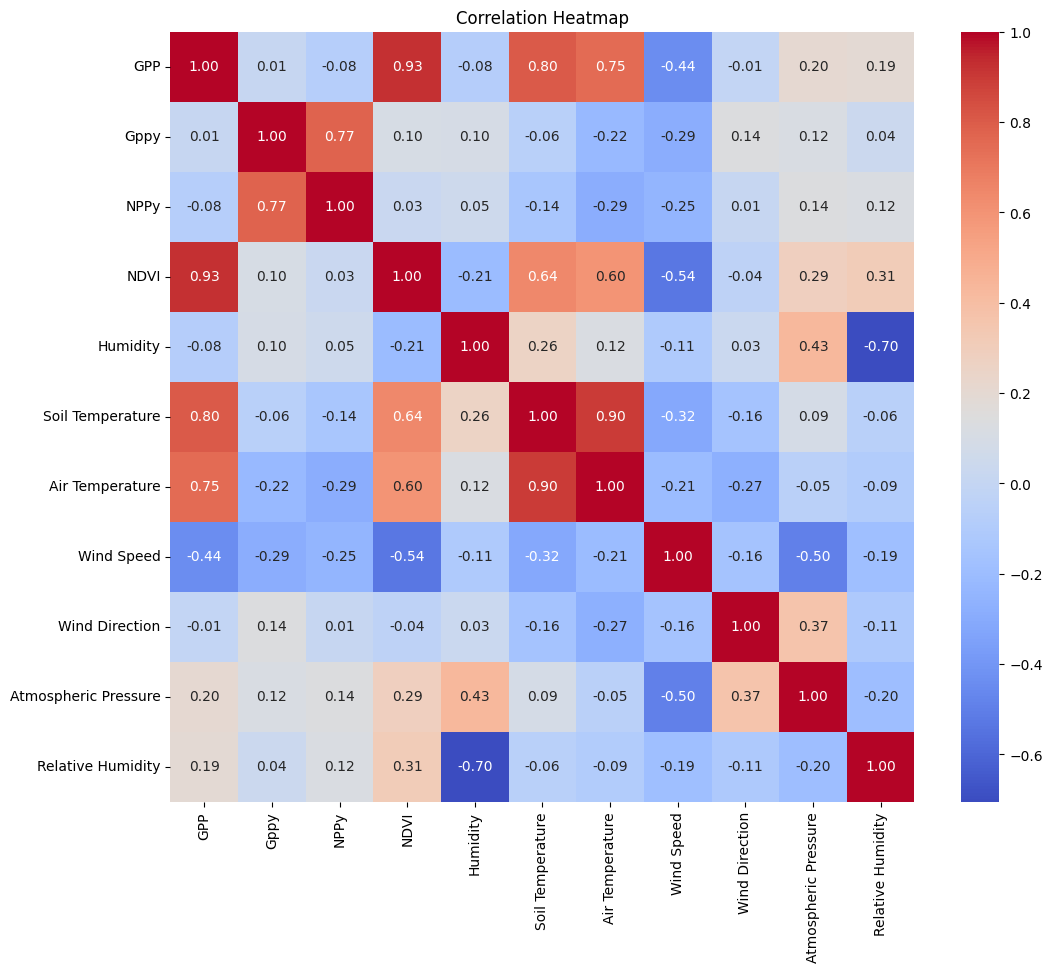

In [ ]:
# Select the columns for correlation analysis
columns_for_correlation = ['GPP','Gppy', 'NPPy', 'NDVI', 'Humidity','Soil Temperature','Air Temperature'
                             ,'Wind Speed','Wind Direction','Atmospheric Pressure','Relative Humidity']

# Calculate the correlation matrix
correlation_matrix = final_data[columns_for_correlation].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Find pairs of features with correlation greater than 0.85
for i in range(len(correlation_matrix.columns)):
  for j in range(i + 1, len(correlation_matrix.columns)):
    if abs(correlation_matrix.iloc[i, j]) > 0.80:
      print(f'{correlation_matrix.columns[i]} and {correlation_matrix.columns[j]} have a correlation of {correlation_matrix.iloc[i, j]:.2f}')

GPP and NDVI have a correlation of 0.93
GPP and Soil Temperature have a correlation of 0.80
Soil Temperature and Air Temperature have a correlation of 0.90


In [ ]:
final_data.drop(columns=['GPP','Air Temperature'], inplace= True)

In [ ]:
final_data.head()

,Date,latitude,longitude,.geo,NDVI,Gppy,NPPy,Npp,Humidity,Soil Temperature,Wind Speed,Wind Direction,Atmospheric Pressure,Relative Humidity
0,2015-03-06,41.16166,-96.470572,"{""type"":""Point"",""coordinates"":[-96.47057243500...",0.157344,1.5606,0.8462,0.007971,55.744444,0.185556,4.141667,244.777778,97.826667,52.655556
1,2015-03-06,41.16166,-96.470303,"{""type"":""Point"",""coordinates"":[-96.47030294041...",0.157344,1.5860,0.8475,0.007855,55.744444,0.185556,4.141667,244.777778,97.826667,52.655556
2,2015-03-06,41.16166,-96.470033,"{""type"":""Point"",""coordinates"":[-96.47003344583...",0.147357,1.6086,0.8440,0.007450,55.744444,0.185556,4.141667,244.777778,97.826667,52.655556
3,2015-03-06,41.16166,-96.469764,"{""type"":""Point"",""coordinates"":[-96.46976395124...",0.157601,1.6555,0.8506,0.007296,55.744444,0.185556,4.141667,244.777778,97.826667,52.655556
4,2015-03-06,41.16166,-96.469494,"{""type"":""Point"",""coordinates"":[-96.46949445666...",0.138603,1.6307,0.8334,0.007002,55.744444,0.185556,4.141667,244.777778,97.826667,52.655556


In [ ]:
final_data.shape

(22874, 14)

In [ ]:
final_data.to_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Nebraska/Data_Neb_i_m_s/Final_merged_data.csv', index=False)